<a href="https://colab.research.google.com/github/AlisonJD/RTACourse/blob/main/Use_the_Right_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

% cd "/content/gdrive/My Drive/Colab Notebooks/Tinybird/RTACourse"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/Tinybird/RTACourse


#Use the Right Database
*Different problems require different solutions.[...] If you have different data, you have a different problem.* – CppCon 2014: [Mike Acton Data-Oriented Design and C++](https://www.youtube.com/watch?v=rX0ItVEVjHc&t=2110s)

You already know some databases out there - we will group them in different ways to better understand when to use each one depending on your particular needs: from performance to budget and from relational databases to analytic ones.

When you need to persist data you have many options. The simplest one is to use a file. But you quickly realize that this approach has several problems, for example, what happens if you want to update part of the file, add more data, access a portion of it or be able to recover if the electricity goes down...

That’s why databases were created, they provide a friendly layer to access data (stored on files most of the time). So a database is nothing more than a really advanced file management system. This quote from 1970 explains this concept:

*Future users of large data banks must be protected from having to know how the data is organized in the machine (the internal representation). A prompting service which supplies such information is not a satisfactory solution.* - E. F. CODD, IBM Research Laboratory, San Jose, California - 1970

This quote is from [A Relational Model of Data for Large Shared Data Banks](https://www.seas.upenn.edu/~zives/03f/cis550/codd.pdf) the paper that first introduced relational databases. 

##Row Based vs Column Based
One of the main criteria to differentiate database systems is how they organize the data. If we talk about NoSQL databases then the line is fuzzy but for relational databases there are usually two ways: ordered by column or by row.



So for example, if you want to get all `session_id` items in a row based database you need to fetch all the data. In a columnar database you will only fetch `session_id` data. For an analytical query, usually only a small number of table columns need to be read. This is very important because as we saw memory has a speed limit and the less you use, the faster your query runs. In a column-oriented database, you can read just the data you need. 

Not only is fetching continuous data faster but for the compressor placing together information that is likely to be similar makes life easier. Obviously the column based approach has its problems, including updating records and maintaining consistency.

This image illustrates this concept:

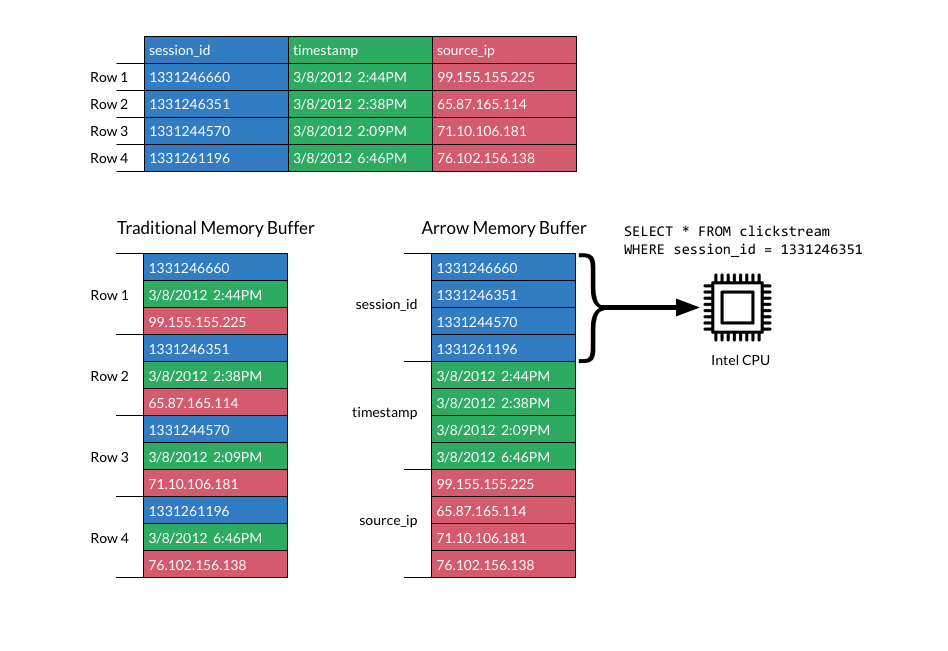

So for example, if you want to get all session_id items in a row based database you need to fetch all the data. In a columnar database you will only fetch session_id data. For an analytical query, usually only a small number of table columns need to be read. This is very important because as we saw memory has a speed limit and the less you use, the faster your query runs. In a column-oriented database, you can read just the data you need.

Not only is fetching continuous data faster but for the compressor placing together information that is likely to be similar makes life easier. Obviously the column based approach has its problems, including updating records and maintaining consistency.

##The Right Database for Each Job
Note that there are many databases out there, here we only mention the ones that have made their source code available; commercial ones have enough budget to hire people to recommend them.

Depending on your data and access patterns you should pick a different database. Some examples:
 - You are going to do a simple application that requires a relational model, SQLite might be the right choice.
 - You need a robust system that ensures data integrity, PostgreSQL or MySQL could be your choice.
 - You need to store unstructured data, MongoDB or Elasticsearch sounds like the right choice.
 - You need to scale a lot: Cassandra, HBase, or any key-value store are suitable.
 - Or maybe you have a graph, so Neo4j is your tool.
 - You have 10 TB of data you need to analyze: ClickHouse, Spark, Presto are good choices.

If you have 10 TB of data and you want random access, to run analytics, do atomic inserts and updates, manage transactions, have a fully scriptable system and scalability then you have a problem because there is no such system. You need to decide which features are the most important for you and pick a database. You could always mix and match using several databases but that requires extra work or copying and managing data.

Copying data from one place to another isn’t a big problem, hardware people have been doing that for many decades. All modern machines have CPUs, GPUs, audio processors… all of them are strong in one feature, so the data is moved to the device that best fits the task.

We will focus on **real-time analytical databases**, that’s it: **databases made to store and analyze large amounts of data in an efficient way and designed to provide low latency** but that usually lack other features such as transactions.